In [1]:
import numpy as np
from scipy.stats import kstest,ks_2samp
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a151ed390>]],
      dtype=object)

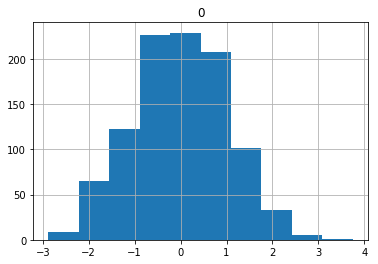

In [3]:
n=1000
x=np.random.normal(0,1,n)
pd.DataFrame(x).hist()

In [4]:
kstest(x,'uniform')

KstestResult(statistic=0.501, pvalue=1.0847002557353696e-232)

In [5]:
kstest(x,'norm')

KstestResult(statistic=0.026156780270203406, pvalue=0.5006662048844397)

In [6]:
kstest(x,'halfnorm')

KstestResult(statistic=0.501, pvalue=1.0847002557353696e-232)

In [8]:
y=np.random.normal(0,1,n)
z=np.random.uniform(0,1,n)


In [10]:
df=pd.DataFrame(x)
df.rename(columns={df.columns[0]:'value'}, inplace=True)

In [11]:
df=df.sort_values(by='value').reset_index(drop=True)

In [12]:
df.head()

,value
0,-2.877469
1,-2.757991
2,-2.490467
3,-2.481928
4,-2.400172


In [13]:
df['prob']=1/n
df.head()

,value,prob
0,-2.877469,0.001
1,-2.757991,0.001
2,-2.490467,0.001
3,-2.481928,0.001
4,-2.400172,0.001


In [15]:
df_y=pd.DataFrame(y)
df_y.rename(columns={df_y.columns[0]:'value'}, inplace=True)
df_y=df_y.sort_values(by='value').reset_index(drop=True)
df_y['prob']=1/n
df_y.head()

,value,prob
0,-4.114604,0.001
1,-3.259294,0.001
2,-3.213702,0.001
3,-2.911492,0.001
4,-2.752591,0.001


In [17]:
x_y_df=df.merge(df_y, how='outer', left_on='value', right_on='value').sort_values(by='value')
x_y_df.head()

,value,prob_x,prob_y
1000,-4.114604,NaN,0.001
1001,-3.259294,NaN,0.001
1002,-3.213702,NaN,0.001
1003,-2.911492,NaN,0.001
0,-2.877469,0.001,NaN


In [18]:
x_y_df=x_y_df.fillna(0)

In [19]:
x_y_df['cum_x']=x_y_df['prob_x'].cumsum()

In [20]:
x_y_df.head()

,value,prob_x,prob_y,cum_x
1000,-4.114604,0.000,0.001,0.000
1001,-3.259294,0.000,0.001,0.000
1002,-3.213702,0.000,0.001,0.000
1003,-2.911492,0.000,0.001,0.000
0,-2.877469,0.001,0.000,0.001


In [23]:
x_y_df['cum_y']=x_y_df['prob_y'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_x,cum_y
1000,-4.114604,0.000,0.001,0.000,0.001
1001,-3.259294,0.000,0.001,0.000,0.002
1002,-3.213702,0.000,0.001,0.000,0.003
1003,-2.911492,0.000,0.001,0.000,0.004
0,-2.877469,0.001,0.000,0.001,0.004


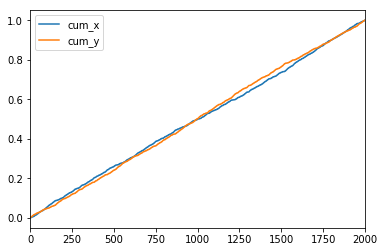

In [26]:
x_y_df=x_y_df.reset_index(drop=True)


x_y_df[['cum_x','cum_y']].plot()

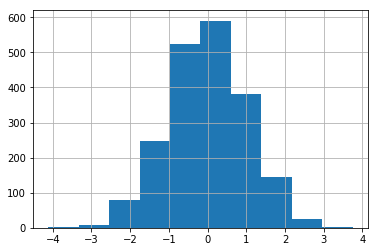

In [27]:
x_y_df.value.hist()

In [28]:
ks_2samp(x,y)

Ks_2sampResult(statistic=0.039000000000000035, pvalue=0.4253468503964972)

In [31]:
df_z=pd.DataFrame(z)
df_z.rename(columns={df_z.columns[0]:'value'}, inplace=True)
df_z=df_z.sort_values(by='value').reset_index(drop=True)
df_z['prob']=1/n
df_z.head()

,value,prob
0,0.000148,0.001
1,0.002279,0.001
2,0.002940,0.001
3,0.003241,0.001
4,0.003430,0.001


In [32]:
x_z_df=df.merge(df_z, how='outer', left_on='value', right_on='value').sort_values(by='value')
x_z_df.head()

,value,prob_x,prob_y
0,-2.877469,0.001,NaN
1,-2.757991,0.001,NaN
2,-2.490467,0.001,NaN
3,-2.481928,0.001,NaN
4,-2.400172,0.001,NaN


In [37]:
x_z_df=x_z_df.fillna(0)
x_z_df['cum_x']=x_z_df['prob_x'].cumsum()
x_z_df['cum_y']=x_z_df['prob_y'].cumsum()

x_z_df.head()

,value,prob_x,prob_y,cum_x,cum_y
0,-2.877469,0.001,0.0,0.001,0.0
1,-2.757991,0.001,0.0,0.002,0.0
2,-2.490467,0.001,0.0,0.003,0.0
3,-2.481928,0.001,0.0,0.004,0.0
4,-2.400172,0.001,0.0,0.005,0.0


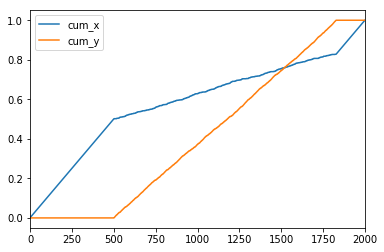

In [38]:
x_z_df=x_z_df.reset_index(drop=True)
x_z_df[['cum_x','cum_y']].plot()

In [39]:
kstest(x_y_df.value,'norm')

KstestResult(statistic=0.016211955483060203, pvalue=0.6692802847071443)

In [41]:
kstest(x_z_df.value,'norm')

KstestResult(statistic=0.2498905461717238, pvalue=1.5974195091768463e-110)